In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train_data = pd.read_csv('./zhengqi_train.txt', sep='\t', encoding='utf-8')
test_data = pd.read_csv('./zhengqi_test.txt', sep='\t', encoding='utf-8')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
V0        2888 non-null float64
V1        2888 non-null float64
V2        2888 non-null float64
V3        2888 non-null float64
V4        2888 non-null float64
V5        2888 non-null float64
V6        2888 non-null float64
V7        2888 non-null float64
V8        2888 non-null float64
V9        2888 non-null float64
V10       2888 non-null float64
V11       2888 non-null float64
V12       2888 non-null float64
V13       2888 non-null float64
V14       2888 non-null float64
V15       2888 non-null float64
V16       2888 non-null float64
V17       2888 non-null float64
V18       2888 non-null float64
V19       2888 non-null float64
V20       2888 non-null float64
V21       2888 non-null float64
V22       2888 non-null float64
V23       2888 non-null float64
V24       2888 non-null float64
V25       2888 non-null float64
V26       2888 non-null float64
V27       2888 non-null float

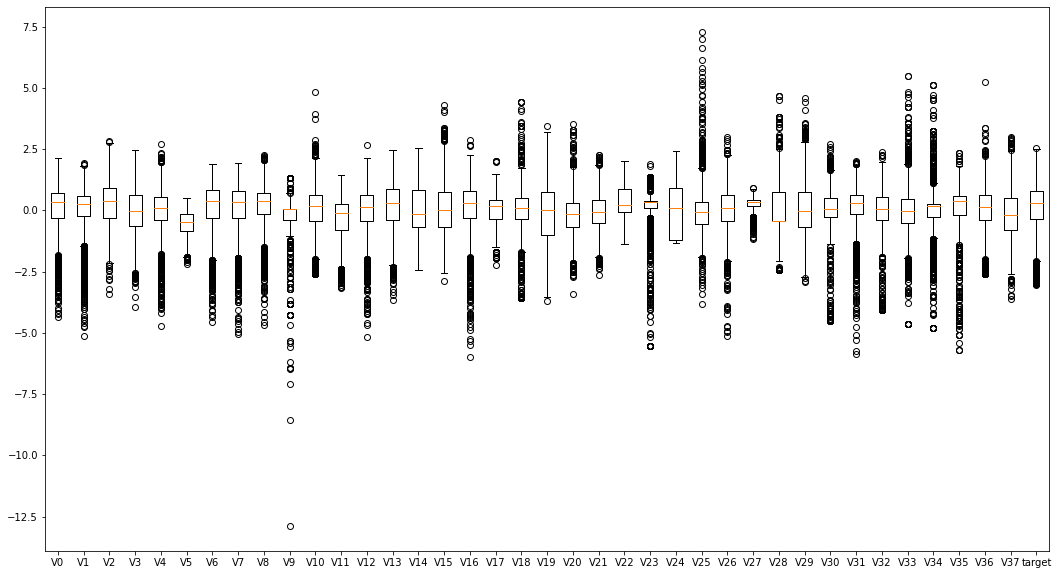

In [4]:
# 异常值分析
# 绘制各个特征箱线图
plt.figure(figsize=(18,10))
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.show()

In [5]:
# 删除异常值
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 2887
Data columns (total 39 columns):
V0        2886 non-null float64
V1        2886 non-null float64
V2        2886 non-null float64
V3        2886 non-null float64
V4        2886 non-null float64
V5        2886 non-null float64
V6        2886 non-null float64
V7        2886 non-null float64
V8        2886 non-null float64
V9        2886 non-null float64
V10       2886 non-null float64
V11       2886 non-null float64
V12       2886 non-null float64
V13       2886 non-null float64
V14       2886 non-null float64
V15       2886 non-null float64
V16       2886 non-null float64
V17       2886 non-null float64
V18       2886 non-null float64
V19       2886 non-null float64
V20       2886 non-null float64
V21       2886 non-null float64
V22       2886 non-null float64
V23       2886 non-null float64
V24       2886 non-null float64
V25       2886 non-null float64
V26       2886 non-null float64
V27       2886 non-null float

In [6]:
# 最大值和最小值的归一化
from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

display(train_data_scaler.describe())
display(test_data_scaler.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2884.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.127274
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.983462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.348500
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.313000
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.794250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.642905,0.715637,0.477791,0.632726,0.635558,1.130681,0.664798,0.699688,0.637926,0.871534,...,0.313556,0.369132,0.614756,0.719928,0.623793,0.457349,0.482778,0.673164,0.326501,0.577034
std,0.166253,0.152936,0.155176,0.161379,0.154392,0.360555,0.162899,0.149311,0.156540,0.120675,...,0.149752,0.117538,0.156533,0.144621,0.175284,0.098071,0.100537,0.118082,0.132661,0.141870
min,-0.074195,-0.051989,-0.138124,0.106035,-0.024088,0.379633,-0.165817,-0.082831,-0.197059,0.034142,...,0.000000,0.066604,0.000000,-0.233613,-0.000620,0.000000,0.000000,-0.222222,0.000000,0.042836
25%,0.568618,0.663494,0.390845,0.516451,0.571256,0.862598,0.594035,0.651593,0.564653,0.794789,...,0.278919,0.279498,0.579211,0.683816,0.555366,0.412901,0.454490,0.666667,0.256819,0.482353
50%,0.681537,0.755256,0.504641,0.651177,0.654017,0.980532,0.694483,0.727247,0.675796,0.888889,...,0.280045,0.362120,0.627710,0.756987,0.652605,0.454518,0.499949,0.676518,0.342977,0.570437
75%,0.756506,0.811222,0.591869,0.740527,0.720226,1.538750,0.777778,0.798593,0.745856,0.948727,...,0.281593,0.451148,0.688438,0.804116,0.725806,0.500000,0.511365,0.755580,0.415371,0.667722
max,0.996747,1.028693,0.858835,1.022766,1.240345,2.005990,0.943285,0.924777,1.023497,1.051273,...,0.997889,0.792045,1.062535,0.925686,0.985112,1.000000,1.000000,0.918568,0.697043,1.003167


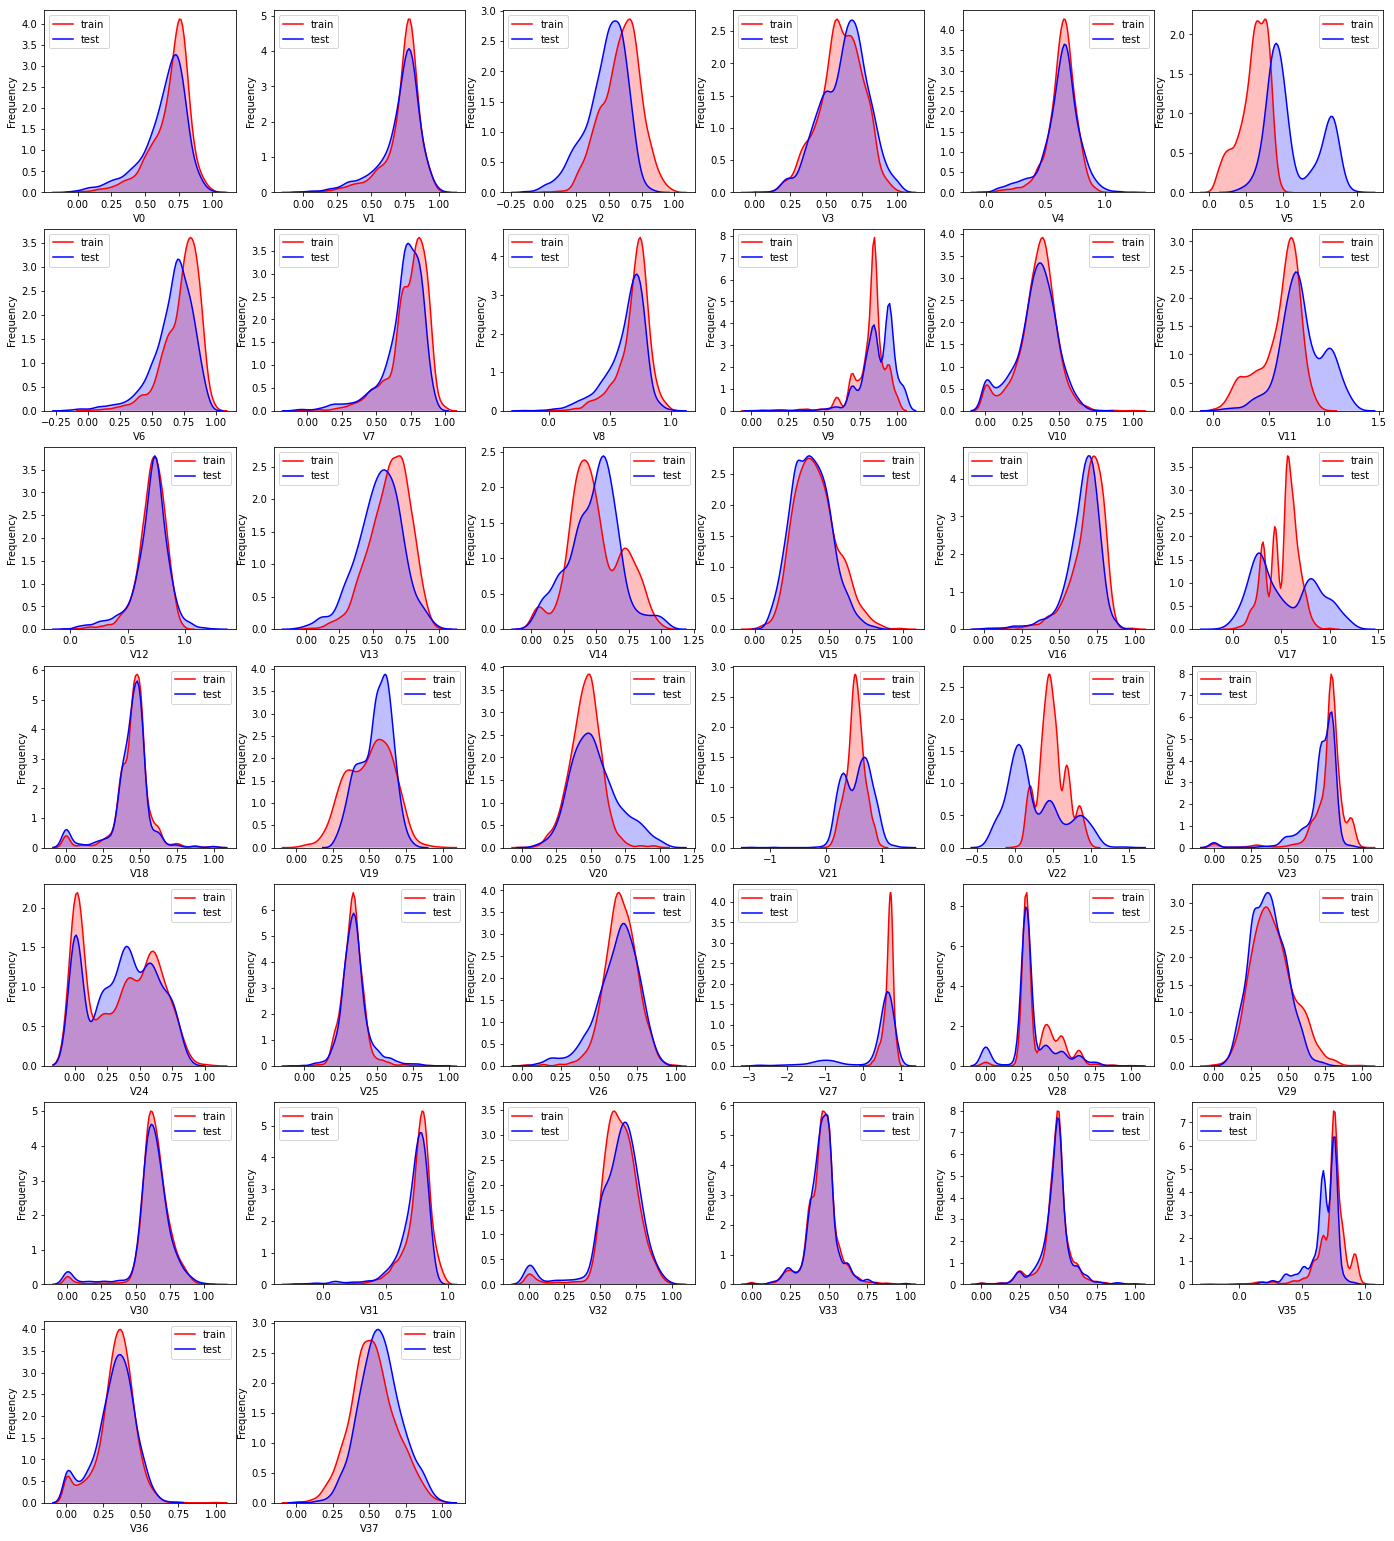

In [7]:
# 通过KDE分布图查看并对比训练集和测试集中特征的分布情况，删除分布不一致的特征变量
count_columns = 6
count_rows = len(test_data.columns)
plt.figure(figsize = (4*count_columns, 4*count_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(count_rows, count_columns, i)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
    i+=1
plt.show()

In [31]:
# 发现V5、9、11、17、22、28几个特征分布差异较大，影响模型泛化能力，删除
train_data_drop = train_data_scaler.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
display(train_data_drop.head())

test_data_drop = test_data_scaler.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
display(test_data_drop.head())

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.427136,0.385874,0.613522,0.221743,0.698875,...,0.406834,0.641467,0.666159,0.679280,0.00000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.465152,0.385874,0.724232,0.373887,0.690502,...,0.371596,0.643552,0.748349,0.721619,0.37495,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.495905,0.385874,0.733458,0.466415,0.699012,...,0.387480,0.676487,0.779472,0.610577,0.37495,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.521712,0.425208,0.734467,0.350013,0.706972,...,0.390683,0.684269,0.779726,0.722084,0.37495,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.541338,0.425208,0.721638,0.314675,0.736206,...,0.413107,0.776126,0.785950,0.693393,0.37495,0.462067,0.755580,0.296712,0.543288,0.384


,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V27,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.728470,0.781534,0.511364,0.609231,0.689140,0.792150,0.803761,0.711547,0.292015,0.756382,...,0.656774,0.394955,0.634241,0.738948,0.759926,0.511395,0.482877,0.686495,0.260133,0.606033
1,0.694393,0.797017,0.507843,0.609231,0.654555,0.782414,0.795435,0.658065,0.294173,0.772715,...,0.665390,0.394955,0.704141,0.766641,0.714020,0.463040,0.461562,0.711186,0.294927,0.563198
2,0.645756,0.718750,0.497599,0.624045,0.630736,0.782105,0.795435,0.643650,0.393040,0.732638,...,0.597415,0.335558,0.640356,0.769563,0.726892,0.460166,0.460147,0.711186,0.379939,0.633333
3,0.687268,0.769318,0.505922,0.624825,0.613511,0.780405,0.797014,0.677815,0.290397,0.703678,...,0.654380,0.335558,0.766259,0.761687,0.790167,0.454518,0.454490,0.711186,0.247515,0.606486
4,0.717937,0.788352,0.580666,0.624825,0.633697,0.770206,0.796009,0.698717,0.326679,0.700247,...,0.665869,0.285104,0.666759,0.791286,0.656638,0.454518,0.454490,0.711186,0.314555,0.472549


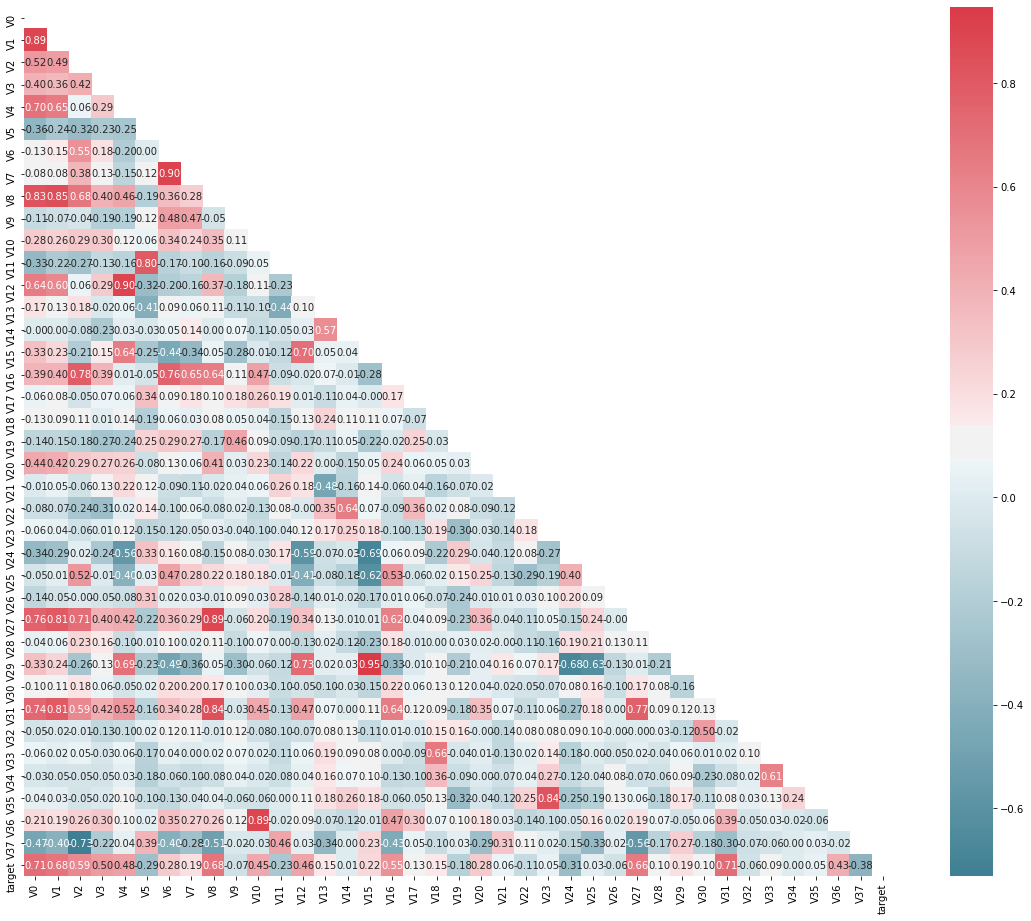

In [8]:
# 特征相关性
# 计算特征相关性

plt.figure(figsize=(20,16))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#亮度，饱和度
cmap = sns.diverging_palette(220,10,as_cmap=True)
g = sns.heatmap(mcorr, mask=mask,  square=True, cmap=cmap, annot=True, fmt="0.2f")
plt.show()

In [9]:
# 特征降维
# 选取相关性系数大于0.1的特征变量
mcorr = mcorr.abs()
valid_corr = mcorr[mcorr["target"]>0.1]["target"]
print(valid_corr.sort_values(ascending=False))

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64


In [32]:
# 多重共线性分析
# 特征之间相关性系数较大，造成特征冗余，使用PCA对数据进行处理，去除多重共线性
from sklearn.decomposition import PCA

# 保持90%的信息
pca = PCA(n_components=0.9)
train_pca_90 = pca.fit_transform(train_data_drop.iloc[:,0:-1])
test_pca_90 = pca.fit_transform(test_data_drop)

train_pca_90 = pd.DataFrame(train_pca_90)
test_pca_90 = pd.DataFrame(test_pca_90)

train_pca_90["target"] = train_data_scaler["target"]
train_pca_90.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,-9.848132e-18,-2.462033e-17,-3.693050e-17,-3.693050e-17,2.462033e-17,9.848132e-18,2.462033e-17,-8.863319e-17,-4.924066e-17,7.139896e-17,-8.001607e-17,-8.370912e-17,8.370912e-17,0.127274
std,3.820198e-01,3.463009e-01,2.574157e-01,2.073018e-01,1.929777e-01,1.794461e-01,1.561195e-01,1.543626e-01,1.334772e-01,1.324139e-01,1.196034e-01,1.120571e-01,1.012471e-01,0.983462
min,-9.190627e-01,-9.785629e-01,-6.946211e-01,-8.120470e-01,-7.258966e-01,-6.509712e-01,-6.219183e-01,-5.041459e-01,-5.721968e-01,-5.781714e-01,-4.162991e-01,-4.684235e-01,-3.583673e-01,-3.044000
25%,-2.534774e-01,-2.597089e-01,-1.820855e-01,-1.231884e-01,-1.150960e-01,-1.179787e-01,-9.875001e-02,-9.545009e-02,-7.722019e-02,-8.002389e-02,-7.936844e-02,-6.809922e-02,-6.976573e-02,-0.348500
50%,-2.933790e-02,-1.354673e-02,1.589750e-02,-1.355418e-02,-1.084489e-02,3.074227e-03,7.165648e-03,-8.250816e-04,-2.963143e-03,-1.427195e-02,2.907130e-03,-3.967636e-04,-2.785021e-03,0.313000
75%,1.956498e-01,2.332975e-01,1.682187e-01,1.216902e-01,9.909179e-02,1.143868e-01,1.058882e-01,9.777841e-02,7.763870e-02,7.428159e-02,7.769719e-02,6.575672e-02,6.405782e-02,0.794250
max,1.639636e+00,1.387792e+00,1.022771e+00,9.525805e-01,1.067248e+00,7.779305e-01,7.023855e-01,6.834515e-01,5.928590e-01,7.879142e-01,5.601988e-01,5.838300e-01,3.899804e-01,2.538000


In [33]:
# 保留16个主成分
pca = PCA(n_components=16)
train_pca_16 = pca.fit_transform(train_data_drop.iloc[:,0:-1])
test_pca_16 = pca.fit_transform(test_data_drop)

train_pca_16 = pd.DataFrame(train_pca_16)
test_pca_16 = pd.DataFrame(test_pca_16)

train_pca_16["target"] = train_data_scaler["target"]
train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2886.000000,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,0.000000,-1.969626e-17,-3.200643e-17,-2.462033e-17,1.969626e-17,9.848132e-18,1.477220e-17,-9.601929e-17,-4.677863e-17,6.893693e-17,-9.355726e-17,-8.124709e-17,8.370912e-17,5.401085e-17,-1.477220e-17,3.446846e-17,0.127274
std,0.382020,3.463009e-01,2.574157e-01,2.073018e-01,1.929777e-01,1.794461e-01,1.561195e-01,1.543626e-01,1.334772e-01,1.324139e-01,1.196034e-01,1.120571e-01,1.012471e-01,9.834433e-02,9.194558e-02,8.465756e-02,0.983462
min,-0.919063,-9.785629e-01,-6.946211e-01,-8.120470e-01,-7.258966e-01,-6.509712e-01,-6.219183e-01,-5.041465e-01,-5.721980e-01,-5.781718e-01,-4.162999e-01,-4.684224e-01,-3.583737e-01,-3.650530e-01,-3.221747e-01,-3.565597e-01,-3.044000
25%,-0.253477,-2.597089e-01,-1.820855e-01,-1.231884e-01,-1.150960e-01,-1.179787e-01,-9.875003e-02,-9.545023e-02,-7.722013e-02,-8.002359e-02,-7.936831e-02,-6.809931e-02,-6.977303e-02,-6.400441e-02,-5.874389e-02,-5.211540e-02,-0.348500
50%,-0.029338,-1.354673e-02,1.589750e-02,-1.355418e-02,-1.084488e-02,3.074212e-03,7.165764e-03,-8.251531e-04,-2.963887e-03,-1.427186e-02,2.907363e-03,-3.965410e-04,-2.781179e-03,1.995197e-03,-3.608719e-03,-1.217987e-03,0.313000
75%,0.195650,2.332975e-01,1.682187e-01,1.216902e-01,9.909178e-02,1.143868e-01,1.058882e-01,9.777836e-02,7.763862e-02,7.428147e-02,7.769702e-02,6.575592e-02,6.406298e-02,6.349694e-02,5.753993e-02,4.843567e-02,0.794250
max,1.639636,1.387792e+00,1.022771e+00,9.525805e-01,1.067248e+00,7.779304e-01,7.023856e-01,6.834512e-01,5.928590e-01,7.879143e-01,5.601990e-01,5.838307e-01,3.899968e-01,3.863821e-01,4.409889e-01,4.041051e-01,2.538000


In [34]:
# 切分数据集，验证集
from sklearn.model_selection import train_test_split
train_pca_16 = train_pca_16.fillna(0)
train = train_pca_16[test_pca_16.columns]
target = train_pca_16["target"]

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)

In [35]:
# 使用sklearn调用线性回归模型进行预测
from sklearn.metrics import mean_squared_error #评价指标
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression score: ", score)

LinearRegression score:  0.26581987755390324


In [36]:
# 使用sklearn调用K近邻回归模型进行预测
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=3) #最近的三个
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, test_pred)
print("KNeighborsRegressor score: ", score)

KNeighborsRegressor score:  0.2921414111880046


In [37]:
# 使用sklearn调用决策树回归模型进行预测
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, test_pred)
print("DecisionTreeRegressor score: ", score)

DecisionTreeRegressor score:  0.5211142370242214


In [38]:
# 使用sklearn调用随即森林回归模型进行预测
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=200)
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, test_pred)
print("RandomForestRegressor score: ", score)

RandomForestRegressor score:  0.24883657736418688


In [39]:
# 使用LightGBM回归模型进行预测
import lightgbm as lgb
clf = lgb.LGBMRegressor(learning_rate=0.01,
                       max_depth=-1,
                       n_estimators=500,
                       boosting_type='gbdt',
                       random_state=2020,
                       objective='regression')
clf.fit(train_data, train_target, eval_metric='MSE',verbose=50)
score = mean_squared_error(test_target, test_pred)
print("LightGBM score: ", score)

LightGBM score:  0.24883657736418688
